In [1]:
import math, random
import numpy as np
import pandas as pd # Para imprimir as listas de forma mais clara
pd.set_option('display.max_colwidth', 2000)
pd.set_option('display.expand_frame_repr', False)
from IPython.display import clear_output
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Jupyter interativo
from ipywidgets import interactive, fixed
%matplotlib inline

## Implementação
Foi implementada somente uma classe, responsavel pela execução do algoritmo diferencial dos 2 problemas/função Peaks e Rastrigin e por este motivo, preferiu-se enviar somente um arquivo contendo toda a análise, uma vez que a classe é a mesma.
O código foi adaptado do pseudo-código disponibilizado na apresentação do trabalho e escolheu-se retornar 3 variáveis dessa função principal(run):

- x_t_i, em que retorna uma lista contendo toda a população de cada geração, podendo ser acessada por x_t_i[numgeracao], retornando assim uma lista de tamanho n-linhas(variaveis x1 e x2) e N-colunas(individuo).
    
    
- pontuacoes, em que retorna uma lista contendo toda a pontuação de cada indivíduo (Resultado da funcao envolvendo x1 e x2) de cada geração, podendo ser acessada por pontuacoes[numgeracao], onde a lista tem tamanho N, referente ao número de individuos na população.


- menoresPontuacoes, em que retorna uma lista contendo a melhor pontuação (ou seja, o menor valor para as 2 funções) de cada geração, podendo ser acessada por menoresPontuacoes[numgeracao]

Toda a análise e uso de funções para plotar gráficos e observar o resultado foi utilizando esses 3 valores acima, como pode-se observar abaixo na implementação da classe, das funções e na análise do algoritmo para as funções Peaks e Rastrigin.

In [2]:
class Algoritmo_Diferencial():
    def __init__(self,nPopulacao,tipo='peaks'):
        self.population = np.zeros(shape=[2,nPopulacao])
        self.type = tipo
        if tipo == 'peaks':
            print("tipo eh peaks")
            self.population[0,:] = np.random.uniform(-3, 3,size=nPopulacao) # Atribui valores entre -3 a 3 para x1
            self.population[1,:] = np.random.uniform(-2, 2,size=nPopulacao) # Atribui valores entre -2 a 2 para x2
        elif tipo == 'rastrigin':
            print("tipo eh rastrigin")
            self.population[0,:] = np.random.uniform(-2, 2,size=nPopulacao) # Atribui valores entre -2 a 2 para x1
            self.population[1,:] = np.random.uniform(-2, 2,size=nPopulacao) # Atribui valores entre -2 a 2 para x2   
            

    def Peaks(self,x):
        F = 3*(1-x[0])**2*math.exp(-(x[0]**2) - (x[1]+1)**2) \
           - 10*(x[0]/5 - x[0]**3 - x[1]**5)*math.exp(-x[0]**2-x[1]**2) \
           - 1/3*math.exp(-(x[0]+1)**2 - x[1]**2) 
        return F
    
    
    def Rastrigin(self,x):
        Q = np.eye(len(x))
        X = np.matmul(Q,x)
        n = len(X)
        F = 0
        for i in range(n):
            F = F + X[i]**2 - 10*math.cos(2*math.pi*X[i])
        return F
            
        
    def Funcao(self,x):
        if self.type == 'peaks':
            return self.Peaks(x)
        elif self.type == 'rastrigin':
            return self.Rastrigin(x)

    
    def run(self,C=0.9,F=0.9,maxgen=500):
        ngen=0
        N = np.shape(self.population)[1] # Numero de individuos é o numero de colunas
        n = np.shape(self.population)[0] # Numero de variaveis  é o numero de linhas
        x_t_i = np.zeros(shape=[maxgen,n, N]) # Armazena todas as populacoes de todas as geracoes
        
        pontuacoes = np.zeros(shape=[maxgen,N]) # Armazena todas as pontuacoes(F(x1,x2)) de cada individuo de todas as geracoes
        menoresPontuacoes = [] # Melhor pontuacao de cada geração
        x_t_i[0] = self.population # Primeira populacao é a inicializada

        while ngen < maxgen-1: 
            u_i_j = np.empty(shape=[n, N])
            for i in range(N): # de i = 1 até N
                if ngen == 0: # Inicializar primeira pontuacao
                    pontuacoes[ngen][i] = self.Funcao(x_t_i[ngen][:, i])
       
                r1,r2,r3 = random.sample(range(1, N), 3) # Seleciona aleatoriamente delta_i, r1,r2 e r3
                delta_i = random.sample(range(1, n),1)
                for j in range(n): # de j = 1 até n (tamanho do numero de variaveis, pegar o do 1o)
                    if (random.uniform(0, 1)) <= C or j == delta_i:
                         aux = x_t_i[ngen][:,r1] + F*(x_t_i[ngen][:,r2] - x_t_i[ngen][:,r3])
                    else:
                        aux = x_t_i[ngen][:,i]
                x_t_i_atual = x_t_i[ngen][:, i]
                
                if self.Funcao(aux) <= self.Funcao(x_t_i_atual):
                    x_t_i[ngen+1][:, i] =  aux # Coloca na proxima geracao
                else:
                    x_t_i[ngen+1][:, i] =  x_t_i_atual.T
                    
                pontuacoes[ngen+1][i] = self.Funcao(x_t_i[ngen][:, i])
            if ngen == 0: # inicializar primeira melhor pontuacao
                menoresPontuacoes.append(min([pontuacoes[ngen][i] for i in range(N)]))   
                
            menoresPontuacoes.append(min([pontuacoes[ngen+1][i] for i in range(N)]))
            ngen +=1
            clear_output(wait=True) # Limpa o console, para sobrescrever o print abaixo
            print("Geração Atual:{}/{}   ".format(ngen+1,maxgen))
        return x_t_i,pontuacoes,menoresPontuacoes

In [3]:
# Funcoes extras

def Plot2D(output,function,Geracao1=0,Geracao2=39):
    plt.figure(figsize=(7, 4), dpi=100)
    plt.scatter(output[0][Geracao1][0,:], output[0][Geracao1][1,:])
    plt.scatter(output[0][Geracao2][0,:], output[0][Geracao2][1,:])
    plt.xlabel('x1', fontsize=12)
    plt.ylabel('x2', fontsize=12)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.legend(['Geracao1','Geracao2'])
    plt.title("Função " + function)
    plt.show()
    
def InteractivePlot2D(output,function='Peaks'):
    interactive_plot = interactive(Plot2D,output=fixed(output),function=fixed(function), Geracao1=(0, np.shape(output[0])[0]-1, 1),Geracao2=(0, np.shape(output[0])[0]-1, 1))
    return interactive_plot
    
def Plot3D(ClasseAlgoritmo,output,function='Peaks'):
    primeiros_valores_x1 = output[0][0][0].tolist()
    primeiros_valores_x2 = output[0][0][1].tolist()
    primeiras_pontuacoes = output[1][0]
    ultimos_valores_x1 = output[0][-1][0].tolist()
    ultimos_valores_x2 = output[0][-1][1].tolist()
    ultimas_pontuacoes = output[1][-2]

    x1 = np.linspace(-3.5, 3.5, 100)
    x2 = np.linspace(-2.5, 2.5, 100)
    X1,X2 = np.meshgrid(x1, x2)

    Z = np.zeros(shape=[np.shape(X1)[0],np.shape(X2)[0]])
    for i in range(np.shape(X1)[0]):
        for j in range(np.shape(X2)[0]):
            Z[i][j] = ClasseAlgoritmo.Funcao( [X1[i][j],X2[i][j]] )

    font_labels = {'fontsize': 14, 'fontweight': 150}
    fig = plt.figure(figsize=(24,12))
    ax = plt.axes(projection='3d')
    ax.plot_surface(X1, X2, Z, rstride=1, cstride=1,color='orange', edgecolor='none')
    
    ax.set_xlabel('X1', fontdict=font_labels)
    ax.set_ylabel('X2', fontdict=font_labels)
    ax.scatter(primeiros_valores_x1, primeiros_valores_x2, primeiras_pontuacoes,c ='blue',s=30,label="Primeira Geracao")
    ax.scatter(ultimos_valores_x1, ultimos_valores_x2, ultimas_pontuacoes,s=50,c='limegreen',label="Ultima Geracao")
    ax.set_zlabel(function + '(X1, X2)', fontdict=font_labels)
    ax.set_title('Função {} - 3DView'.format(function), fontdict={'fontsize':15})
    ax.legend()

    ax.view_init(-0, 45)
    ax.dist = 8 # default is 10
    ax.autoscale(tight=True)
    

def PlotMelhoresPontuacoes(output,function='Peaks'):
    fig = plt.figure(figsize=(16,4))
    sizeMelhoresPontuacoes = len(output[2])
    plt.scatter(range(sizeMelhoresPontuacoes),output[2][0:sizeMelhoresPontuacoes])
    plt.title("Melhores Pontuações por Geração - Função:{}".format(function))
    plt.xlabel('Geração', fontsize=12)
    plt.ylabel('{}(x1,x2)'.format(function), fontsize=12)
    
    
def bestResult(output): # Retorna o melhor x1,x2 e pontuacao de dada funcao
    x_t_i = output[0][-1]
    pontuacoes = output[1][-1] # Pontuacoes da ultima geracao
    menorPontuacao = output[2][-1]
    indexMenorPontuacao = np.where(pontuacoes == menorPontuacao)
    x1,x2 = x_t_i[0][indexMenorPontuacao],  x_t_i[1][indexMenorPontuacao]
    print("Melhor Resultado: x1={}, x2={}, f(x1,x2)={}".format(x1,x2,menorPontuacao))


## Problema peaks

In [4]:
algoritmoPeaks = Algoritmo_Diferencial(100,tipo='peaks')
outputPeaks = algoritmoPeaks.run(C=0.9,F=0.9,maxgen=40)
bestResult(outputPeaks)

Geração Atual:40/40   
Melhor Resultado: x1=[0.22851971], x2=[-1.62434815], f(x1,x2)=-6.551113512209422


interactive(children=(IntSlider(value=0, description='Geracao1', max=39), IntSlider(value=39, description='Ger…

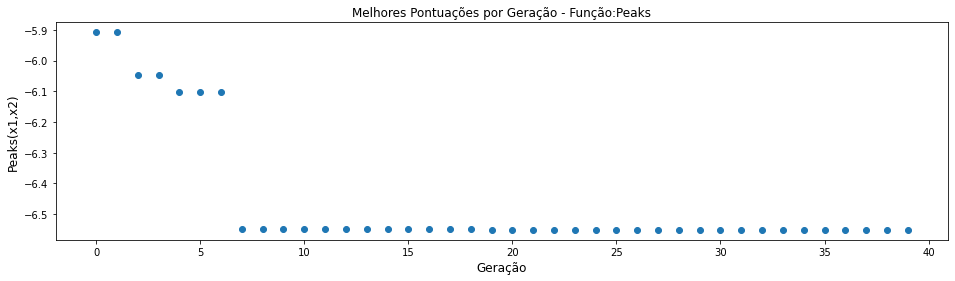

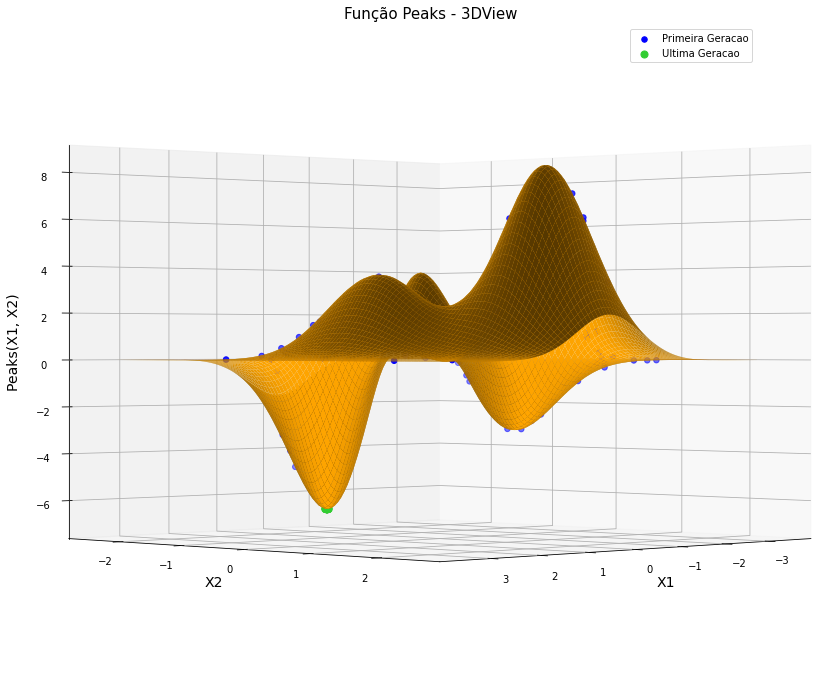

In [5]:
PlotMelhoresPontuacoes(outputPeaks,'Peaks')
display(InteractivePlot2D(outputPeaks,'Peaks'))
Plot3D(algoritmoPeaks,outputPeaks,'Peaks')

### Análise problema Peaks

- Após a execução do algoritmo e a plotagem dos 3 gráficos acima, é possível observar:
    - Uma evolução bastante rápida para o problema Peaks, principalmente através do 1º gráfico interativo em 2D das gerações. 
    - Através da evolução de melhor pontuação do 2º gráfico, percebe-se que o algoritmo convergiu em torno da geração 30, tendo sua melhor pontuação com:

        - x1 = 0.22771526

        - x2 = -1.625172

        - F(x1,x2) = -6.551127602231625 
    
    - Pelo 3º gráfico, observa-se que a ultima geração está totalmente em torno do mínimo global, o que é o objetivo do algoritmo e mostra que ele foi executado com sucesso.

## Problema Rastrigin

In [6]:
algoritmoRastrigin = Algoritmo_Diferencial(100,tipo='rastrigin')
outputRastrigin = algoritmoRastrigin.run(C=0.9,F=0.9,maxgen=40)
bestResult(outputRastrigin)

Geração Atual:40/40   
Melhor Resultado: x1=[0.00740038], x2=[-0.00264182], f(x1,x2)=-19.987752302823765


interactive(children=(IntSlider(value=0, description='Geracao1', max=39), IntSlider(value=39, description='Ger…

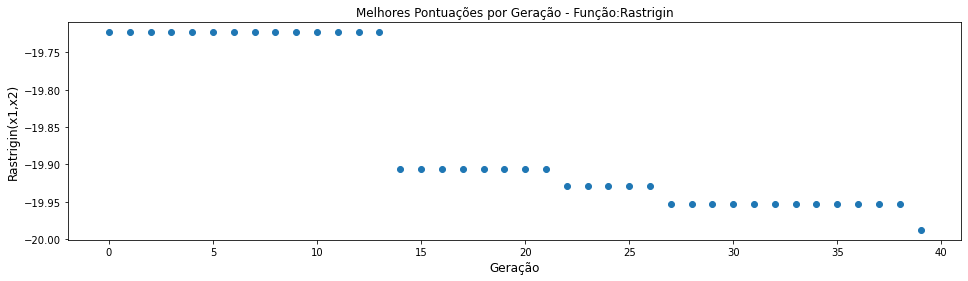

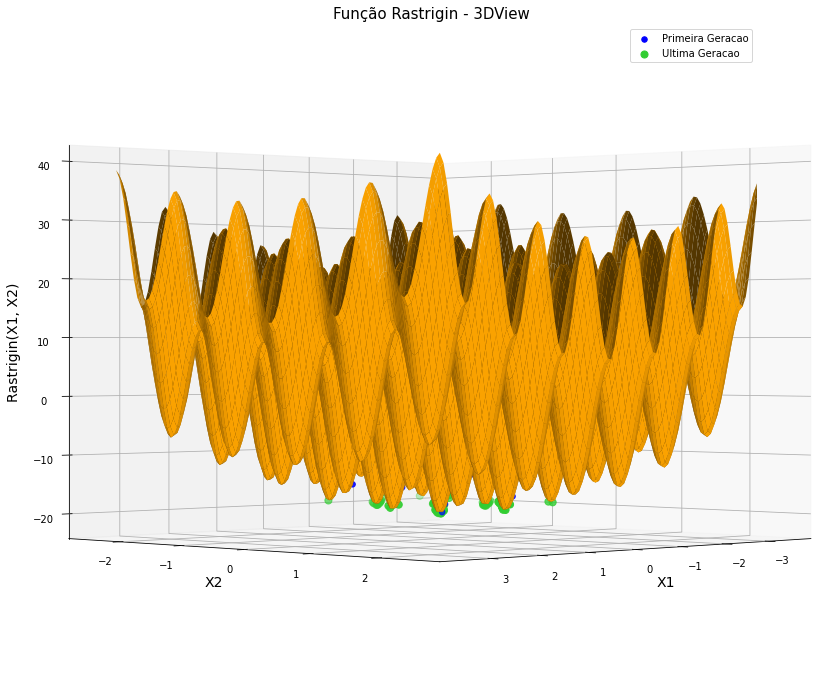

In [7]:
PlotMelhoresPontuacoes(outputRastrigin,'Rastrigin')
display(InteractivePlot2D(outputRastrigin,'Rastrigin'))
Plot3D(algoritmoRastrigin,outputRastrigin,'Rastrigin')

### Análise problema Rastrigin

- Após a execução do algoritmo e a plotagem dos 3 gráficos acima, é possível observar:
    - Uma evolução bastante rápida para o problema Rastrigin, principalmente através do 1º gráfico interativo em 2D das gerações. 
    - Através da evolução de melhor pontuação do 2º gráfico, percebe-se que o algoritmo convergiu em torno da geração 32, tendo sua melhor pontuação com:

        - x1 = 0.00542963

        - x2 = -0.00233153

        - F(x1,x2) = -19.993073343326834
    
    - Pelo 3º gráfico, observa-se que a ultima geração está parcialmente em torno do mínimo global, com uma concentração maior em torno do mínimo esperado, o que é o objetivo do algoritmo e indica que ele foi executado com sucesso. 